# Naive Bayes

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("Data/spam.csv", encoding="latin-1")
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [23]:
np.sum(df[df.columns[2:]].notna())

Unnamed: 2    50
Unnamed: 3    12
Unnamed: 4     6
dtype: int64

In [30]:
df_no_NaN = df.dropna(axis=1)
df_no_NaN.columns = ["class", "content"]

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [31]:
df_no_NaN

,class,content
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


<AxesSubplot:xlabel='class', ylabel='count'>

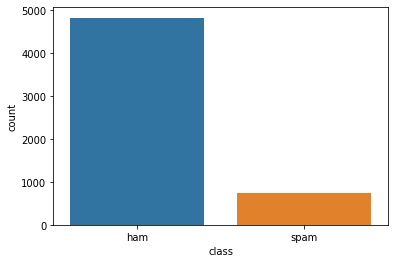

In [32]:
sns.countplot(data=df_no_NaN, x="class")

In [34]:
df_onehot = pd.get_dummies(df_no_NaN, columns = ["class"], drop_first = True)
X, y = df_onehot["content"], df_onehot["class_spam"]

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

xfidf_vectorizer = TfidfVectorizer(stop_words="english") #Stop words are words like “and”, “the”, “him”, which are presumed to be uninformative in representing the content of a text

X_tfidf = xfidf_vectorizer.fit_transform(X)

#We take the whole vocabulary in the columns (except the stop words) and then each position is coded to 0 or 1 (in the document or not)
X_tfidf.todense() #Each row of numbers represent one "document"


matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [40]:
print(f"min_value {X_tfidf.min()}, max value {X_tfidf.max()}")

min_value 0.0, max value 1.0


In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape

((3733, 8404), (1839, 8404))

<AxesSubplot:xlabel='class_spam', ylabel='count'>

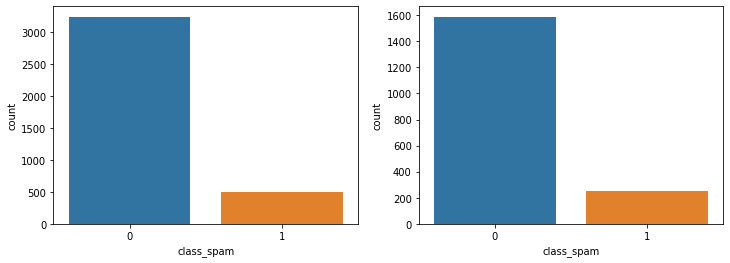

In [44]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))
sns.countplot(x = y_train, ax=ax[0])
sns.countplot(x = y_test, ax=ax[1]) 

### Naive Bayes

There are different types of naive bayes (see sklearn)

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1587
           1       1.00      0.75      0.86       252

    accuracy                           0.97      1839
   macro avg       0.98      0.88      0.92      1839
weighted avg       0.97      0.97      0.96      1839



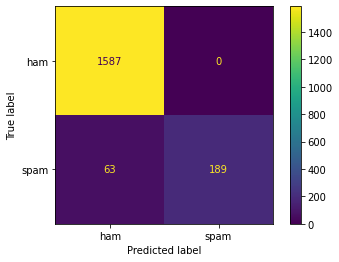

In [45]:
from sklearn.naive_bayes import MultinomialNB, ComplementNB, BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

naive_bayes = dict(
    multinomial = MultinomialNB(),
    bernoulli = BernoulliNB(), 
    complement = ComplementNB()
)

def evaluate_model(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm, display_labels=["ham", "spam"]).plot()

evaluate_model(naive_bayes["multinomial"])

# precision = TP/(TP+FP) Precision is high for multinomial which is good 
# recall = TP(TP+FN)

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1587
           1       0.98      0.81      0.89       252

    accuracy                           0.97      1839
   macro avg       0.97      0.91      0.94      1839
weighted avg       0.97      0.97      0.97      1839



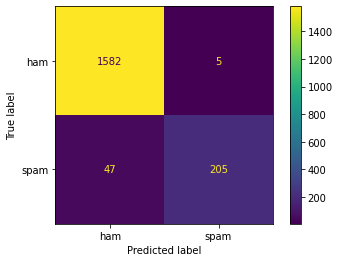

In [46]:
evaluate_model(naive_bayes["bernoulli"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.96      1587
           1       0.66      0.94      0.78       252

    accuracy                           0.93      1839
   macro avg       0.83      0.93      0.87      1839
weighted avg       0.95      0.93      0.93      1839



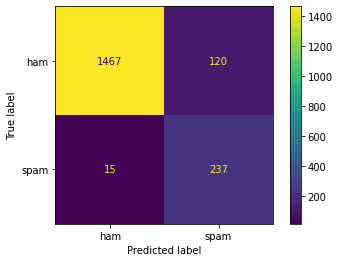

In [47]:
evaluate_model(naive_bayes["complement"])

### Some other models

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       0.97      0.85      0.91       252

    accuracy                           0.98      1839
   macro avg       0.97      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



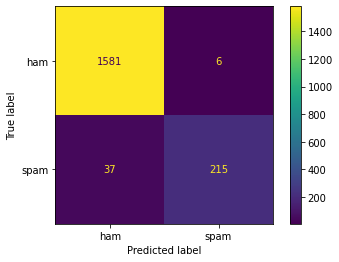

In [48]:
from sklearn.svm import LinearSVC

evaluate_model(LinearSVC())

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      1587
           1       1.00      0.84      0.91       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



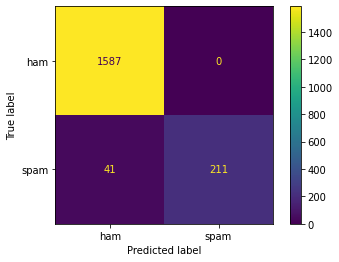

In [49]:
from sklearn.ensemble import RandomForestClassifier

evaluate_model(RandomForestClassifier())

### Combine Models

- plurality vote
- we can get a better results with this (if not one of them is really bad)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1587
           1       1.00      0.85      0.92       252

    accuracy                           0.98      1839
   macro avg       0.99      0.92      0.95      1839
weighted avg       0.98      0.98      0.98      1839



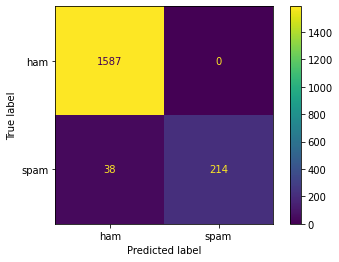

In [50]:
from sklearn.ensemble import VotingClassifier

#Vote soft or hard (soft usually works better, but it does not always work since not all models have predict probability)
#We should have an uneven number, so that we can get a majority vote
vote_clf = VotingClassifier([
    ("rf", RandomForestClassifier()),
    ("svc", LinearSVC()), #Does not give probability
    ("complement", ComplementNB()), 
    ("bernoulli", BernoulliNB()), 
    ("multinomial", MultinomialNB())
])

evaluate_model(vote_clf)

### "Deployment"

In [51]:
from sklearn.pipeline import Pipeline

pipe = Pipeline([("tfidf", TfidfVectorizer(stop_words="english")), ("vote", vote_clf)])

pipe.fit(X, y)

Pipeline(steps=[('tfidf', TfidfVectorizer(stop_words='english')),
                ('vote',
                 VotingClassifier(estimators=[('rf', RandomForestClassifier()),
                                              ('svc', LinearSVC()),
                                              ('complement', ComplementNB()),
                                              ('bernoulli', BernoulliNB()),
                                              ('multinomial',
                                               MultinomialNB())]))])

In [52]:
pipe.predict(["Come and collect your $1000 Bitcoins"]) #Not spam

array([0], dtype=uint8)

In [53]:
pipe.predict(["You will win, $1000 for free"])

array([1], dtype=uint8)

In [54]:
pipe.predict(["You get 500"])

array([1], dtype=uint8)